# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Dependencies
import requests
import json
from citipy import citipy
import random
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import linregress
from api_keys import weather_api_key

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [3]:
print(weather_api_key)

68970bdad69e00449a9f178cc072f6f2


## Generate Cities List

In [4]:
#List Generation
cities = []
state_list = []
lat_list = []
lon_list = []
temp_list = []
humid_list = []
cloud_list = []
wind_list = []

In [5]:
data_dict = {
    "City": cities,
    "Country Code": state_list,
    "Latitude (N+/S-)": lat_list,
    "Longitude (E+/W-)": lon_list,
    "Temperature (F)": temp_list,
    "Humidity (%)": humid_list,
    "Cloudiness (%)": cloud_list,
    "Wind Speed (mph)": wind_list
}

In [13]:
def WeatherDataPull(pull_number):
    print("Begining Data Collection")
    print("-----------------------------------------")
    # First Break Condition, limits list size to intended 500 cities
    while len(cities) < pull_number:
        # Restart loop condition to pull new city without appending the duplicate
        restart=True
        while restart:
            restart=False
            #Lat/Long and city name pull
            lat = random.uniform(-90, 90)
            lon = random.uniform(-180, 180)
            cityget = citipy.nearest_city(lat, lon)
            city = str(cityget.city_name)
            state = str(cityget.country_code)
            if city in cities:
                #Duplicate check, if already found, will loop back to top and pull new city without adding to lists
                print("Duplicate City Found")
                restart=True
            else:
                #URL for call
                call_url = url + "q=" + city + "," + state + "&units=imperial&appid=" + weather_api_key
                try:
                    #Attempts the API Pull, if KeyError at the first list append due to bad city, will not append to lists and will skip                           with error message that the city failed to register a data pull
                    city_data = requests.get(call_url).json()
                    lat_list.append(city_data['coord']['lat'])
                    lon_list.append(city_data['coord']['lon'])
                    temp_list.append(city_data['main']['temp'])
                    humid_list.append(city_data['main']['humidity'])
                    cloud_list.append(city_data['clouds']['all'])
                    wind_list.append(city_data['wind']['speed'])
                    cities.append(city)
                    state_list.append(state)
                    city_length = len(cities)
                    print(f"Processing weather data for {city}, {state} | City number {city_length}")
                except KeyError:
                    #Key Error will catch and loop here before appending to any lists
                    print(f"Failed to collect data for {city}, {state}, skipping city")
                    restart=True
                if len(cities) == pull_number:
                    #Second break conditon to hit limit
                    print("-----------------------------------------")
                    print(f"Weather Data collection complete with {(len(cities))} cities collected")
                    break

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
pull_number = int(input("How many cities would you like to pull data for?: "))
#WeatherDataPull(pull_number)

ocessing weather data for sugod, ph | City number 361
Duplicate City Found
Duplicate City Found
Duplicate City Found
Processing weather data for itaituba, br | City number 362
Duplicate City Found
Duplicate City Found
Processing weather data for kyzyl-suu, kg | City number 363
Duplicate City Found
Failed to collect data for taolanaro, mg, skipping city
Processing weather data for necochea, ar | City number 364
Duplicate City Found
Processing weather data for tres arroyos, ar | City number 365
Duplicate City Found
Duplicate City Found
Failed to collect data for payo, ph, skipping city
Processing weather data for maniitsoq, gl | City number 366
Duplicate City Found
Duplicate City Found
Duplicate City Found
Failed to collect data for taolanaro, mg, skipping city
Duplicate City Found
Duplicate City Found
Processing weather data for camacha, pt | City number 367
Duplicate City Found
Duplicate City Found
Processing weather data for emerald, au | City number 368
Processing weather data for se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_data = pd.DataFrame(data_dict)
weather_data.to_csv("Output/weather_data.csv", encoding="utf-8", index=True, header=True)

weather_data

,City,Country Code,Latitude (N+/S-),Longitude (E+/W-),Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,punta arenas,cl,-53.15,-70.92,51.40,61,40,43.62
1,beringovskiy,ru,63.05,179.32,24.03,86,0,8.32
2,kapaa,us,22.08,-159.32,64.40,93,1,5.82
3,rikitea,pf,-23.12,-134.97,74.64,72,100,10.40
4,chuy,uy,-33.70,-53.46,60.46,65,40,14.43
...,...,...,...,...,...,...,...,...
495,menongue,ao,-14.66,17.69,73.85,55,78,0.56
496,verkhnyaya inta,ru,65.98,60.31,36.09,93,100,14.25
497,filadelfia,py,-22.35,-60.03,82.81,49,67,18.43
498,atambua,id,-9.11,124.89,75.20,84,20,1.81


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
weather_summary = weather_data.describe()

weather_summary

,Latitude (N+/S-),Longitude (E+/W-),Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,20.037880,16.559120,57.695360,71.130000,52.332000,8.556100
std,33.749168,93.024709,23.590763,22.119848,38.612532,6.095318
min,-54.800000,-179.170000,-12.330000,3.000000,0.000000,0.090000
25%,-9.072500,-65.485000,42.445000,57.750000,9.000000,3.955000
50%,25.055000,21.090000,60.925000,78.000000,63.000000,6.930000
75%,50.105000,99.142500,77.000000,89.000000,90.000000,11.882500
max,78.220000,179.320000,98.260000,100.000000,100.000000,43.620000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [2]:
weather_output_file = "Output/weather_data.csv"

weather_csv = pd.read_csv(weather_output_file)

weather_csv

,Unnamed: 0,City,Country Code,Latitude (N+/S-),Longitude (E+/W-),Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,0,punta arenas,cl,-53.15,-70.92,51.40,61,40,43.62
1,1,beringovskiy,ru,63.05,179.32,24.03,86,0,8.32
2,2,kapaa,us,22.08,-159.32,64.40,93,1,5.82
3,3,rikitea,pf,-23.12,-134.97,74.64,72,100,10.40
4,4,chuy,uy,-33.70,-53.46,60.46,65,40,14.43
...,...,...,...,...,...,...,...,...,...
495,495,menongue,ao,-14.66,17.69,73.85,55,78,0.56
496,496,verkhnyaya inta,ru,65.98,60.31,36.09,93,100,14.25
497,497,filadelfia,py,-22.35,-60.03,82.81,49,67,18.43
498,498,atambua,id,-9.11,124.89,75.20,84,20,1.81


## Latitude vs. Temperature Plot

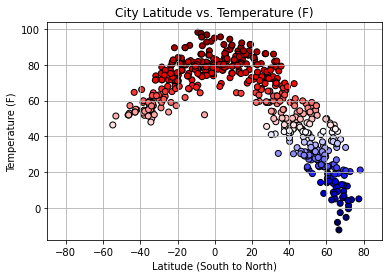

In [65]:
city_lat = weather_csv['Latitude (N+/S-)']
temp = weather_csv['Temperature (F)']

plt.scatter(city_lat, temp, c=temp, cmap="seismic", marker='o', facecolors='red', edgecolors='black')
plt.xlim(-90, 90)
plt.title("City Latitude vs. Temperature (F)")
plt.xlabel("Latitude (South to North)")
plt.ylabel("Temperature (F)")
plt.grid()
plt.show

plt.savefig("Output/Saved Plots/Lat vs Temp.png")

## Latitude vs. Humidity Plot

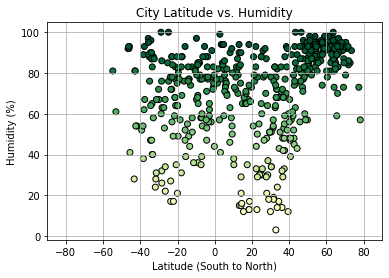

In [66]:
humidity = weather_csv['Humidity (%)']

plt.scatter(city_lat, humidity, c=humidity, cmap='YlGn', marker='o', facecolors='red', edgecolors='black')
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude (South to North)")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.grid()
plt.show

plt.savefig("Output/Saved Plots/Lat vs Humidity.png")

## Latitude vs. Cloudiness Plot

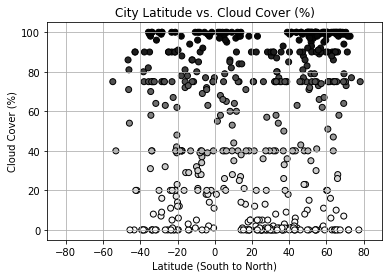

In [67]:
cloud_cover = weather_csv['Cloudiness (%)']

plt.scatter(city_lat, cloud_cover, c=cloud_cover, cmap='Greys', marker='o', facecolors='grey', edgecolors='black')
plt.title("City Latitude vs. Cloud Cover (%)")
plt.xlabel("Latitude (South to North)")
plt.ylabel("Cloud Cover (%)")
plt.xlim(-90, 90)
plt.grid()
plt.show

plt.savefig("Output/Saved Plots/Lat vs Clouds.png")

## Latitude vs. Wind Speed Plot

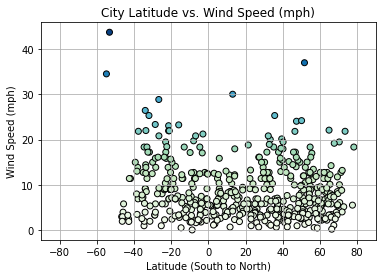

In [68]:
wind = weather_csv['Wind Speed (mph)']

plt.scatter(city_lat, wind, c=wind, cmap='GnBu', marker='o', facecolors='grey', edgecolors='black')
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude (South to North)")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90, 90)
plt.grid()
plt.plot

plt.savefig("Output/Saved Plots/Lat vs Wind.png")

## Linear Regression

In [24]:
north_hemi = weather_csv.loc[weather_csv['Latitude (N+/S-)'] >= 0]

In [25]:
south_hemi = weather_csv.loc[weather_csv['Latitude (N+/S-)'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7966226555401029


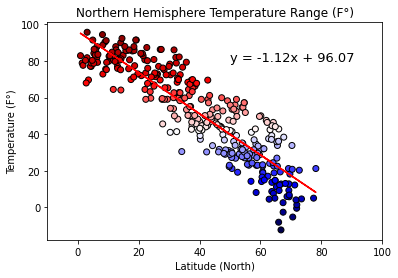

In [69]:
north_lat = north_hemi['Latitude (N+/S-)']
north_temp = north_hemi['Temperature (F)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
north_temp_regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(north_lat, north_temp, c=north_temp, cmap="seismic", marker='o', facecolors='red', edgecolors='black')
plt.xlim(-10, 100)
plt.title("Northern Hemisphere Temperature Range (F°)")
plt.xlabel("Latitude (North)")
plt.ylabel("Temperature (F°)")

plt.plot(north_lat, north_temp_regress_values, "r-")
plt.annotate(line_eq, (50, 80), fontsize=13, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Northern-Hemi v Temp Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5880226777645101


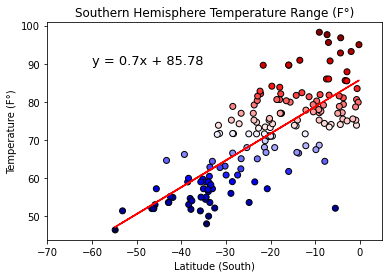

In [70]:
south_lat = south_hemi['Latitude (N+/S-)']
south_temp = south_hemi['Temperature (F)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
south_temp_regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(south_lat, south_temp, c=south_temp, cmap="seismic", marker='o', facecolors='red', edgecolors='black')
plt.xlim(-70, 5)
plt.title("Southern Hemisphere Temperature Range (F°)")
plt.xlabel("Latitude (South)")
plt.ylabel("Temperature (F°)")

plt.plot(south_lat, south_temp_regress_values, "r-")
plt.annotate(line_eq, (-60, 90), fontsize=13, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Southern-Hemi v Temp Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18910128646696464


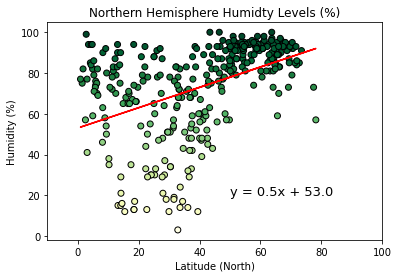

In [71]:
north_lat = north_hemi['Latitude (N+/S-)']
north_humid = north_hemi['Humidity (%)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humid)
north_humid_regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(north_lat, north_humid, c=north_humid, cmap="YlGn", marker='o', edgecolors='black')
plt.xlim(-10, 100)
plt.title("Northern Hemisphere Humidty Levels (%)")
plt.xlabel("Latitude (North)")
plt.ylabel("Humidity (%)")

plt.plot(north_lat, north_humid_regress_values, "r-")
plt.annotate(line_eq, (50, 20), fontsize=13, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Northern-Hemi v Humidity Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 9.228155891437025e-07


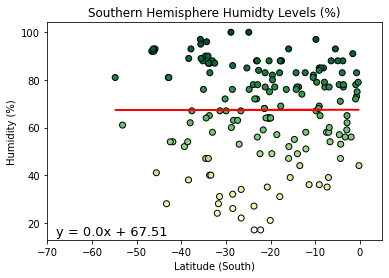

In [72]:
south_lat = south_hemi['Latitude (N+/S-)']
south_humid = south_hemi['Humidity (%)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humid)
south_humid_regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(south_lat, south_humid, c=south_humid, cmap="YlGn", marker='o', edgecolors='black')
plt.xlim(-70, 5)
plt.title("Southern Hemisphere Humidty Levels (%)")
plt.xlabel("Latitude (South)")
plt.ylabel("Humidity (%)")

plt.plot(south_lat, south_humid_regress_values, "r-")
plt.annotate(line_eq, (-68, 15), fontsize=13, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Southern-Hemi v Humidity Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.033543201998569805


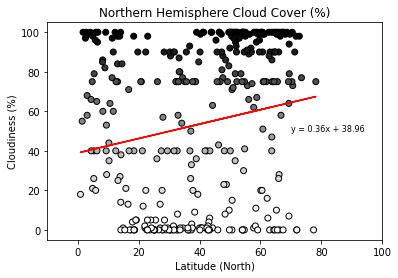

In [73]:
north_lat = north_hemi['Latitude (N+/S-)']
north_cloud = north_hemi['Cloudiness (%)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)
north_cloud_regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(north_lat, north_cloud, c=north_cloud, cmap='Greys', marker='o', edgecolors='black')
plt.xlim(-10, 100)
plt.title("Northern Hemisphere Cloud Cover (%)")
plt.xlabel("Latitude (North)")
plt.ylabel("Cloudiness (%)")

plt.plot(north_lat, north_cloud_regress_values, "r-")
plt.annotate(line_eq, (70, 50), fontsize=8, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Northern-Hemi v Cloud Cover Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 2.5851397587299364e-05


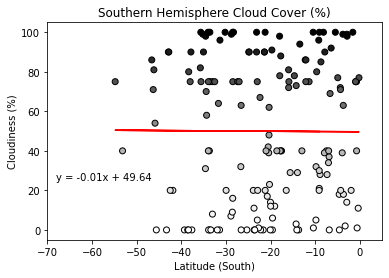

In [74]:
south_lat = south_hemi['Latitude (N+/S-)']
south_cloud = south_hemi['Cloudiness (%)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)
south_cloud_regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(south_lat, south_cloud, c=south_cloud, cmap="Greys", marker='o', edgecolors='black')
plt.xlim(-70, 5)
plt.title("Southern Hemisphere Cloud Cover (%)")
plt.xlabel("Latitude (South)")
plt.ylabel("Cloudiness (%)")

plt.plot(south_lat, south_cloud_regress_values, "r-")
plt.annotate(line_eq, (-68, 25), fontsize=10, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Southern-Hemi v Cloud Cover Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004166745365463327


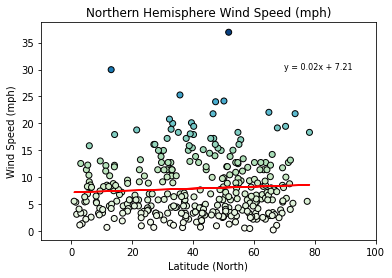

In [75]:
north_lat = north_hemi['Latitude (N+/S-)']
north_wind = north_hemi['Wind Speed (mph)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
north_wind_regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(north_lat, north_wind, c=north_wind, cmap='GnBu', marker='o', edgecolors='black')
plt.xlim(-10, 100)
plt.title("Northern Hemisphere Wind Speed (mph)")
plt.xlabel("Latitude (North)")
plt.ylabel("Wind Speed (mph)")

plt.plot(north_lat, north_wind_regress_values, "r-")
plt.annotate(line_eq, (70, 30), fontsize=8, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Northern-Hemi v Wind Speed Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04732071014430119


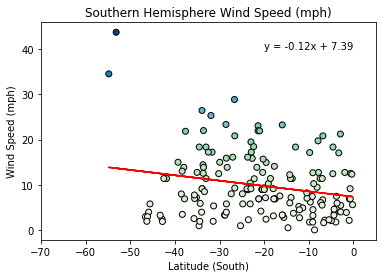

In [76]:
south_lat = south_hemi['Latitude (N+/S-)']
south_wind = south_hemi['Wind Speed (mph)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
south_wind_regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(south_lat, south_wind, c=south_wind, cmap="GnBu", marker='o', edgecolors='black')
plt.xlim(-70, 5)
plt.title("Southern Hemisphere Wind Speed (mph)")
plt.xlabel("Latitude (South)")
plt.ylabel("Wind Speed (mph)")

plt.plot(south_lat, south_wind_regress_values, "r-")
plt.annotate(line_eq, (-20, 40), fontsize=10, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Southern-Hemi v Wind Speed Regression.png")